In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [3]:
df = pd.read_csv('../input/hitters/Hitters.csv')

# > Now we are calling the first 5 data from our Hitters dataset with the head function.

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# > we should see the number of observations and variables amount by using 'shape' 

In [5]:
df.shape

(322, 20)

# We can get the amount of the missing data. The following attempt is to use 'isnull()' function

In [6]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

# If you wana take out the missing datas, use the dropna function.

In [7]:
df = df.dropna()

In [8]:
df.shape

(263, 20)

In [9]:
df['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [10]:
df['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [11]:
df['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [12]:
?pd.get_dummies

In [13]:
df = pd.get_dummies(df, columns = ['League','Division','NewLeague'], drop_first = True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [14]:
y = df['Salary']
X = df.drop('Salary', axis=1)

In [15]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.70, 
                                                    random_state=46)

In [17]:
ridge_model = Ridge().fit(X_train,y_train)

In [18]:
ridge_model.coef_

array([-1.24983261e+00,  5.21635095e+00,  5.99953730e+00,  8.11444821e-01,
       -1.32339857e+00,  2.21500510e+00, -7.20081345e-03, -4.07245382e-01,
        1.71379429e+00,  2.41233831e+00,  3.92493586e-01, -7.25551240e-01,
       -6.94096173e-02,  3.28303081e-01,  1.59739783e-01, -5.95098543e-01,
        6.58770989e+01, -5.32933827e+01, -4.60724983e+01])

In [19]:
ridge_model.intercept_

41.23775972250178

# **PREDICT**

In [20]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

479.22577261077925

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [22]:
ridge_model

Ridge()

In [23]:
alphas = np.linspace(0,1,100)

In [24]:
ridge_model = Ridge()
coefs = []

for i in alphas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    y_pred = ridge_model.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test,y_pred)))

479.07150373703354
479.0729376192798
479.07437464616527
479.0758147957085
479.0772580460737
479.0787043756024
479.08015376275534
479.0816061861641
479.08306162461247
479.08452005704095
479.08598146254036
479.0874458203145
479.08891310975616
479.0903833103891
479.0918564018848
479.09333236404075
479.0948111768174
479.09629282030863
479.0977772747443
479.0992645204962
479.1007545380698
479.10224730810927
479.1037428113911
479.10524102883784
479.1067419414762
479.10824553050924
479.1097517772278
479.1112606630691
479.1127721696029
479.1142862785276
479.1158029716435
479.1173222309193
479.11884403841793
479.1203683763219
479.12189522695024
479.1234245727525
479.1249563962605
479.12649068016617
479.12802740726625
479.1295665604558
479.13110812278524
479.13265207738715
479.1341984075196
479.13574709655126
479.13729812797766
479.1388514853891
479.14040715248854
479.14196511310735
479.14352535116114
479.14508785069387
479.14665259584206
479.14821957086826
479.14978876010275
479.1513601480313
4

In [25]:
ridge_model = Ridge()
coefs = []

for i in alphas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)

In [26]:
coefs

[array([-1.23779725e+00,  5.18587466e+00,  6.01706098e+00,  8.13322073e-01,
        -1.34054418e+00,  2.22157855e+00, -2.39619493e-02, -4.08091170e-01,
         1.72085500e+00,  2.41891143e+00,  3.86642950e-01, -7.28748915e-01,
        -7.00502803e-02,  3.27915831e-01,  1.59837246e-01, -6.61289502e-01,
         7.40780496e+01, -5.47310602e+01, -5.40723430e+01]),
 array([-1.23793312e+00,  5.18622490e+00,  6.01688957e+00,  8.13290387e-01,
        -1.34036185e+00,  2.22150576e+00, -2.37926823e-02, -4.08081101e-01,
         1.72077222e+00,  2.41883210e+00,  3.86709875e-01, -7.28709674e-01,
        -7.00434185e-02,  3.27920059e-01,  1.59836353e-01, -6.60537586e-01,
         7.39836465e+01, -5.47157957e+01, -5.39800348e+01]),
 array([-1.23806866e+00,  5.18657416e+00,  6.01671802e+00,  8.13259001e-01,
        -1.34017972e+00,  2.22143311e+00, -2.36234012e-02, -4.08071067e-01,
         1.72068971e+00,  2.41875308e+00,  3.86776620e-01, -7.28670597e-01,
        -7.00365657e-02,  3.27924280e-01, 

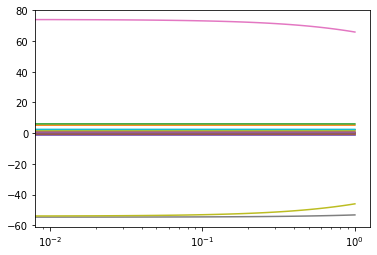

In [27]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')

> We are setting ridge model now. and then our model will predict the result.

In [28]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

479.22577261077925

# **MODEL TUNING**

In [29]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)

In [30]:
ridge_cv = RidgeCV(alphas = alphas1, scoring = 'neg_mean_squared_error', cv=10, normalize=True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([851, 990, 324, 406, 855, 818, 497,  40, 796,  63, 207, 625, 730,
       321,   9, 915, 989, 958, 458, 768, 487, 397, 606,  57, 395, 884,
       332, 703, 626, 918, 393, 763, 213, 802, 768, 711, 667, 413, 132,
       841, 449, 784, 972, 884, 139, 443, 355, 868, 654, 734, 667, 512,
        75, 341, 539, 771, 622, 473, 656, 144, 195, 356, 736, 453, 215,
       782,   4, 517, 502, 379, 457, 953, 566, 728, 526, 542, 808, 515,
       788, 430, 381, 887, 292,  80,  22, 875, 726, 849, 838, 298, 389,
       431, 527, 918, 691, 895, 272,  34, 482, 234]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [31]:
ridge_cv.alpha_

4

In [38]:
ridge_cv = RidgeCV(alphas = alphas2, scoring = 'neg_mean_squared_error', cv=10, normalize=True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [44]:
ridge_cv = RidgeCV(alphas = alphas2, scoring = 'neg_mean_squared_error', cv=10, normalize=True)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [45]:
ridge_cv.alpha_

0.01155064850041579

# **TUNED MODEL**

In [42]:
ridge_tuned = Ridge(alpha = 0.3289666123287841).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

412.1727227135045

In [43]:
ridge_tuned = Ridge(alpha = 0.3289666123287841).fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

303.3449061724622